### Curso 2 de Dados da Alura

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este Notebook tem várias semelhanças com o 1, mas alguns aperfeiçoamentos.

Meu arquivo de dados agora é lido no Google Drive e pelo Github direto... A151346189_28_143_208.csv

A página do Git da Alura está aqui: 
https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv

A informação são os dados de internação do SUS, de 2008 em diante, por Unidade da Federação.

Para abrir o arquivo vamos usar o pandas

In [8]:
import pandas as pd

Vou ficar com os dados do Git da Alura, que parece ser o 2 do curso 1.

In [9]:
dadosSUS = pd.read_csv("https://raw.githubusercontent.com/Filgueiras/bootcamp_datascience/main/Parte01/A211736189_28_143_208-Marco-Mod02.csv",
                       encoding="ISO-8859-1",sep=";", skiprows=3, skipfooter=12, thousands=".",decimal=",")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [10]:
dadosSUS.head()



,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [11]:
#dadosSUS.tail()

Para tratar os dados importados como texto no formato numérico, deve tratar a importação com os valores de "thousands" e "decimal". Lembrando que é para utilizar o formato do texto (inglês ou português). Ex: em Inglês, "." é decimal e "," separador de milhar. O arquivo é brasileiro, então usamos o que estamso acostumados, que é o inverso do que citei. Vale notar que o Python vai mostrar os números no formato inglês.

In [12]:
dadosSUS.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

A notação em número científico não ajuda a visualização. O Pandas nos permite alterar o formato de apresentação dos números.

In [13]:
pd.options.display.float_format = "{:.2f}".format

In [14]:
dadosSUS.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

Agora mostrar um "truque" de converter texto em dataset - ou poderíamos dizer um """truque""", se é que vc me entende, rsrs. (texto longo pede aspas triplas).

In [15]:
dadosPopulacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

In [16]:
from io import StringIO

dadosPopulacaoIO = StringIO(dadosPopulacao)
pd.read_csv(dadosPopulacaoIO, sep = "\t")

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


#Agora deixei alguns gráficos da AULA 01... depois voltamos aos dados de população...

In [17]:
dadosSUS['2008/Ago'].mean()

26636409.892222222

Mostrar um gráfico simples do mês para cada UF

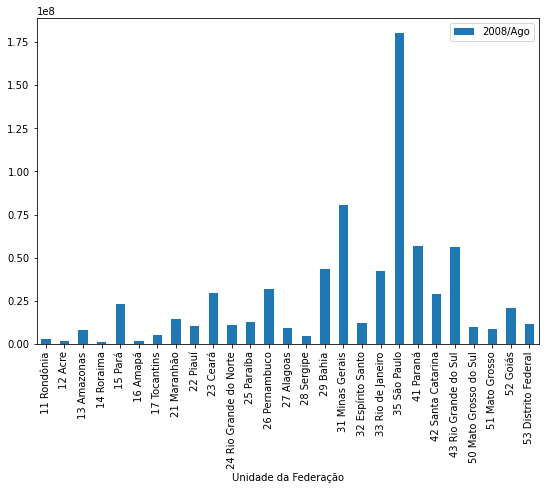

In [18]:
dadosSUS.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))


Melhorando o gráfico porque precisamos melhorar os números da visualização. Só que o pandas não tem recursos gráficos, ele usa o Matplotlib, que preciso importar para melhorar detalhes de visualização dos dados.

Text(0.5, 1.0, 'Valor por Unidade Federativa')

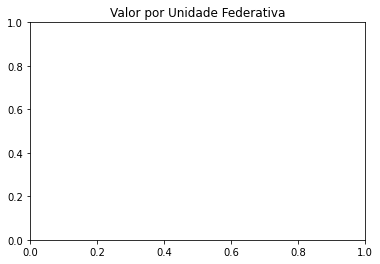

In [19]:
import matplotlib.pyplot as plt

plt.title("Valor por Unidade Federativa")


Vamos continuar... agora melhorando os gráficos, ver eixos, etc. Mas a documentação de ajuda é outra, do Matplotlib... Achei alguns dados aqui https://matplotlib.org/api/ticker_api.html?highlight=format 
Mas não era o suficiente para quem não conhece do assunto, o instrutor da Alura indicou importar: 
matplotlib.ticker.FormatStrFormatter (mas este a documentação diz que é antigo)

Ah, alguns minutos depois o instrutor falou que o método é antigo e não serve mais, que há um método melhor.
matplotlib.ticker.StrMethodFormatter
Nota: o formato a ser utilizado é "{x:.2f}".
Eu tentei mudar o "X" para "a" e deu erro... o número precisa mesmo ser identificado como "x".
O "f" é de float, indicando 2 pontos depois da vírgula.


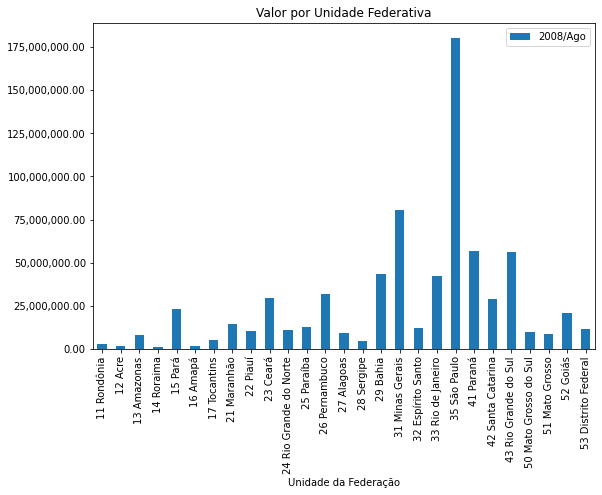

In [20]:
import matplotlib.ticker as ticker;

ax = dadosSUS.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por Unidade Federativa")
plt.show()

Desafio 1: colocar uma mensagem mais descritiva para o gráfico

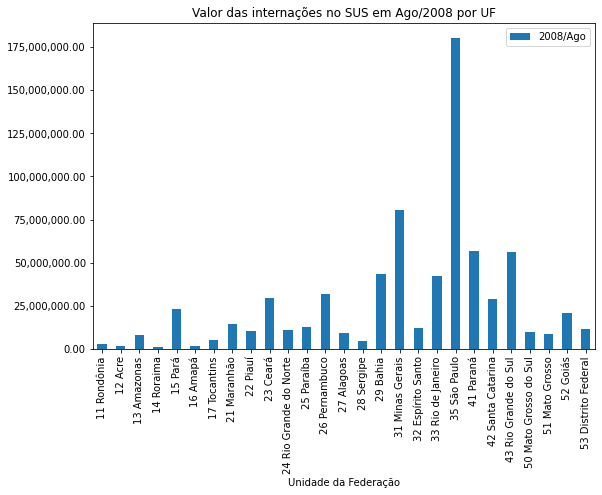

In [21]:
import matplotlib.ticker as ticker;

ax = dadosSUS.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor das internações no SUS em Ago/2008 por UF")
plt.show()

Desafio 2: faça a mesma análise para o mês mais recente

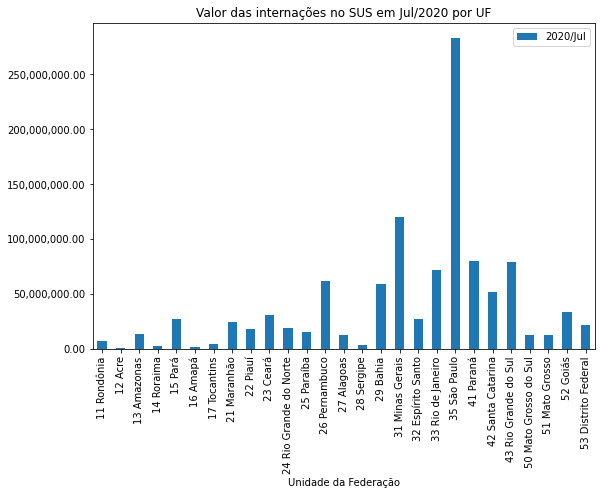

In [22]:
import matplotlib.ticker as ticker;

ax = dadosSUS.plot(x="Unidade da Federação", y="2020/Jul", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor das internações no SUS em Jul/2020 por UF")
plt.show()

E agora para ver dois meses? 
Tenho que fazer uma lista dentro do array:
dadosNovos[["2010/jan","2011/jan"]] 

Ah, e é case sensitive, para dar certo precisa ser: 2010/Jan, não "jan" ("j" minúsculo).

In [23]:
dadosSUS[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


E como pegar apenas as colunas/linhas onde há valor? Vamos ver um dos jeitos usando o Pandas... A média, por exemplo, ignora os nulos.
Importante: isso não dará certo se a importação de números não estiver correta. É preciso verificar apenas a média. Se não vier é preciso fazer o tratamento de números já feito alguns comandos acima, na importação (indicar decimal e milhar). 

In [24]:
dadosSUS.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

Tentando entender os dados nulos ou não-numéricos... Parece que o "-" não é só visualização, é também informação.

#O que eu quero e ainda não funciona: todas as células iguais a "-" em um índice de colunas - faltam conceitos.

In [25]:
dadosSUS.ne("-")

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

Seguindo com a aula, após encontrar os índices das células utilizadas para obter média

In [26]:
dadosUteisIndex = dadosSUS.mean().index
dadosUteisIndex

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

Porém esta estratégia não é muito boa... Precisamos de uma lista mutável, o que não acontece com o uso de index...
Precisamos converter este index para lista com o comando tolist. (repara que muda até a forma de mostrar a resposta)

In [27]:
dadosUteisLista = dadosSUS.mean().index.tolist()
dadosUteisLista

['2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',

A ideia do index é usar a lista de "colunas" como índice, mas ela não pode ser alterada. Se eu quiser incluir um item na lista, ou até excluir, o Python vai me ignorar.
Repare como usar os dois para filtrar itens, por exemplo...

In [28]:
dadosSUS[dadosUteisIndex]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587

#De volta à lista de população dos Estados (UFs) brasileiros




In [29]:
dadosPopulacaoIO = StringIO(dadosPopulacao)
populacao = pd.read_csv(dadosPopulacaoIO, sep = "\t")

In [30]:
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


Ajustes nos nomes de colunas

In [31]:
populacao["populacao"] = populacao["População"]
populacao["uf"] = populacao["Unidade federativa"].str.strip()

Ajuste dos dados "ruins"

In [32]:
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)

Também tornando número a coluna de % da população (e dando um nome melhor para ela) 

In [33]:
populacao["% da pop. total"] = populacao["% da pop. total"].str.replace("%","")
populacao["pct"] = populacao["% da pop. total"].str.replace(",",".").astype(float)

Agora temos a coluna "populacao" como int

In [34]:
display(populacao.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Posição             27 non-null     object 
 1   Unidade federativa  27 non-null     object 
 2   População           27 non-null     object 
 3   % da pop. total     27 non-null     object 
 4   País comparável     27 non-null     object 
 5   populacao           27 non-null     int64  
 6   uf                  27 non-null     object 
 7   pct                 27 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.9+ KB


None

Detalhe: havia um problema com a posição do texto, que estava alinhado à direita... Se fazendo ocomando abaixo não aparecer "São", é porque é preciso fazer o strip (semelhante ao trim), que arranca os espaços em branco do texto.

In [35]:
populacao["uf"].str[:3]

1     São
2     Min
3     Rio
4     Bah
5     Par
6     Rio
7     Per
8     Cea
9     Par
10    San
11    Goi
12    Mar
13    Ama
14    Esp
15    Par
16    Rio
17    Mat
18    Ala
19    Pia
20    Dis
21    Mat
22    Ser
23    Ron
24    Toc
25    Acr
26    Ama
27    Ror
Name: uf, dtype: object

Vamos arrumar o nome do estado (UF) no dadosSUS... pq o nome contem um código.
Vou separar código em uma coluna e nome da uf em outra.

In [36]:
dadosSUS["uf_code"]=dadosSUS["Unidade da Federação"].str[:2]
dadosSUS["uf"]=dadosSUS["Unidade da Federação"].str[2:]
dadosSUS["uf"]=dadosSUS["uf"].str.strip()

In [37]:
dadosSUS.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,uf_code,uf
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,11,Rondônia
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63,12,Acre
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,13,Amazonas
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18,14,Roraima
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71,15,Pará


Agora é para fazer o join de populacao e dadosSUS...

In [38]:
populacao = populacao.drop("Unidade federativa", axis=1)
populacao = populacao.drop("População", axis=1)
populacao = populacao.drop("% da pop. total", axis=1)
populacao = populacao.drop("País comparável", axis=1)

In [39]:
dadosSUS = dadosSUS.drop("Unidade da Federação", axis= 1)

In [40]:
populacao.head()

,Posição,populacao,uf,pct
1,1,46289333,São Paulo,21.90
2,2,21331292,Minas Gerais,10.10
3,3,17366189,Rio de Janeiro,8.20
4,4,14930634,Bahia Bahia,7.10
5,5,11516840,Paraná,5.40


In [41]:
dadosSUS.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,uf_code,uf
0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,11,Rondônia
1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63,12,Acre
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,13,Amazonas
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18,14,Roraima
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71,15,Pará


In [42]:
dadosUteis = dadosSUS[["uf","2020/Jul"]]
dadosUteis = dadosUteis.set_index("uf")

dadosUteisJun = dadosSUS[["uf","2020/Jun"]]
dadosUteisJun = dadosUteisJun.set_index("uf")


In [43]:
populacao = populacao.set_index("uf")

#Agora vamos ao JOIN!

In [44]:
dadosUteis.join(populacao)

,2020/Jul,Posição,populacao,pct
uf,,,,
Rondônia,7407388.24,23,1796460.00,0.80
Acre,1163813.08,25,894470.00,0.40
Amazonas,13358514.02,13,4228381.00,2.00
Roraima,2739498.41,27,631181.00,0.30
Pará,27618727.51,NaN,nan,nan
Amapá,2155083.37,26,861773.00,0.40
Tocantins,4489665.87,24,1590248.00,0.70
Maranhão,24374205.15,11,7127460.00,3.40
Piauí,18019214.49,19,3281480.00,1.60


Deu problema na Bahia e no Pará, por causa de texto duplicado ao copiar e colar 

A lógica abaixo usa o texto de dadosUteis para corrigir o da populacao. Se eu achar qualquer nome duplicado de dadosUteis em populacao, eu troco isso pelo nome não duplicado. Como estou usando "loc", que dá erro se não encontrar nada, então criei um try/except (try/catch no Java) para tratar isso e escrever se o dado está bom (a segunda vez que eu rodo aparece todo mundo, na primeira, ele corrige que está duplicado.

In [45]:
for estado in dadosUteis.index:
  try:
    populacao.loc[f"{estado} {estado}"]
    populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
    print(f"Tranformando {estado} {estado} em apenas {estado}")
  except:
    print(f"Nome Ok para {estado}")

Nome Ok para Rondônia
Nome Ok para Acre
Nome Ok para Amazonas
Nome Ok para Roraima
Tranformando Pará Pará em apenas Pará
Nome Ok para Amapá
Nome Ok para Tocantins
Nome Ok para Maranhão
Nome Ok para Piauí
Nome Ok para Ceará
Nome Ok para Rio Grande do Norte
Nome Ok para Paraíba
Nome Ok para Pernambuco
Nome Ok para Alagoas
Nome Ok para Sergipe
Tranformando Bahia Bahia em apenas Bahia
Nome Ok para Minas Gerais
Nome Ok para Espírito Santo
Nome Ok para Rio de Janeiro
Nome Ok para São Paulo
Nome Ok para Paraná
Nome Ok para Santa Catarina
Nome Ok para Rio Grande do Sul
Nome Ok para Mato Grosso do Sul
Nome Ok para Mato Grosso
Nome Ok para Goiás
Nome Ok para Distrito Federal


#Join (segunda tentativa)

In [46]:
comparaSUSePop = dadosUteis.join(populacao)
comparaSUSePopJun = dadosUteisJun.join(populacao)

In [47]:
populacao.join(dadosUteis)

,Posição,populacao,pct,2020/Jul
uf,,,,
São Paulo,1,46289333,21.90,282709570.31
Minas Gerais,2,21331292,10.10,120467187.34
Rio de Janeiro,3,17366189,8.20,71540227.33
Bahia,4,14930634,7.10,58898100.40
Paraná,5,11516840,5.40,80320852.69
Rio Grande do Sul,6,11422973,5.40,78929703.81
Pernambuco,7,9616621,4.50,62325444.34
Ceará,8,9187103,4.30,30809221.22
Pará,9,8690745,4.10,27618727.51


Guardei o join em um novo dataset e vou criar algumas colunas comparativas

In [48]:
pd.options.display.float_format = "{:.2f}".format

mediaJul = comparaSUSePop["2020/Jul"].mean()
medianaJul = comparaSUSePop["2020/Jul"].median()

mediaJun = comparaSUSePopJun["2020/Jun"].mean()
medianaJun = comparaSUSePopJun["2020/Jun"].median()


display(mediaJul)
display(medianaJul)

40717083.952962965

22233542.26

In [49]:
comparaSUSePop["per_capta"] = comparaSUSePop["2020/Jul"]/comparaSUSePop["populacao"]
comparaSUSePop["desvio_media"] = comparaSUSePop["2020/Jul"]/mediaJul
comparaSUSePop["desvio_mediana"] = comparaSUSePop["2020/Jul"]/medianaJul

In [50]:
comparaSUSePopJun["per_capta"] = comparaSUSePopJun["2020/Jun"]/comparaSUSePop["populacao"]
comparaSUSePopJun["desvio_media"] = comparaSUSePopJun["2020/Jun"]/mediaJun
comparaSUSePopJun["desvio_mediana"] = comparaSUSePopJun["2020/Jun"]/medianaJun

In [51]:
comparaSUSePop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2020/Jul        27 non-null     float64
 1   Posição         27 non-null     object 
 2   populacao       27 non-null     int64  
 3   pct             27 non-null     float64
 4   per_capta       27 non-null     float64
 5   desvio_media    27 non-null     float64
 6   desvio_mediana  27 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [52]:
comparaSUSePopJun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2020/Jun        27 non-null     float64
 1   Posição         27 non-null     object 
 2   populacao       27 non-null     int64  
 3   pct             27 non-null     float64
 4   per_capta       27 non-null     float64
 5   desvio_media    27 non-null     float64
 6   desvio_mediana  27 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


Que tal arrumar os dados pelo gasto per capta? Ou total?

In [53]:
comparaSUSePop["despesa"]=comparaSUSePop["2020/Jul"]
comparaSUSePopJun["despesa"]=comparaSUSePopJun["2020/Jun"]

comparaSUSePop.drop("2020/Jul", axis=1)
comparaSUSePopJun.drop("2020/Jun", axis=1)

#.sort_values(by="per_capta",ascending=False)
#comparaSUSePopJun["despesa"]=comparaSUSePop.sort_values(by="per_capta",ascending=False)

,Posição,populacao,pct,per_capta,desvio_media,desvio_mediana,despesa
uf,,,,,,,
Rondônia,23,1796460,0.80,5.12,0.20,0.39,9193593.76
Acre,25,894470,0.40,2.46,0.05,0.09,2199920.70
Amazonas,13,4228381,2.00,4.14,0.39,0.75,17509334.66
Roraima,27,631181,0.30,5.10,0.07,0.14,3216466.51
Pará,9,8690745,4.10,4.07,0.78,1.51,35396030.78
Amapá,26,861773,0.40,3.13,0.06,0.11,2699492.23
Tocantins,24,1590248,0.70,3.16,0.11,0.21,5018138.13
Maranhão,11,7127460,3.40,4.37,0.69,1.33,31128144.66
Piauí,19,3281480,1.60,4.69,0.34,0.65,15375523.59


In [54]:
comparaSUSePop=comparaSUSePop.sort_values(by="per_capta",ascending=False)

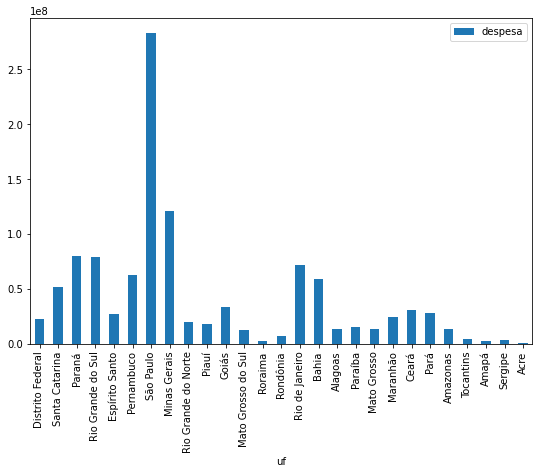

In [55]:
comparaSUSePop[["despesa"]].plot(kind="bar",figsize=(9,6))

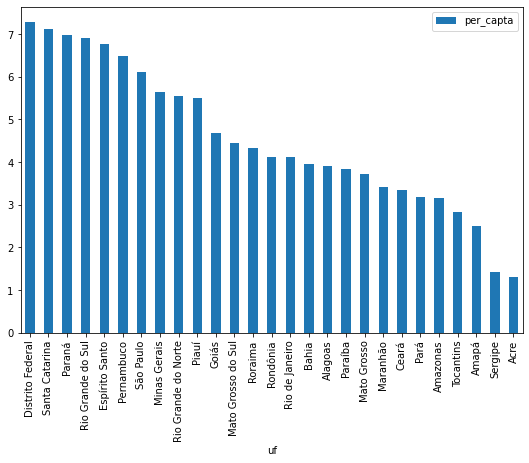

In [56]:
comparaSUSePop[["per_capta"]].plot(kind="bar",figsize=(9,6))

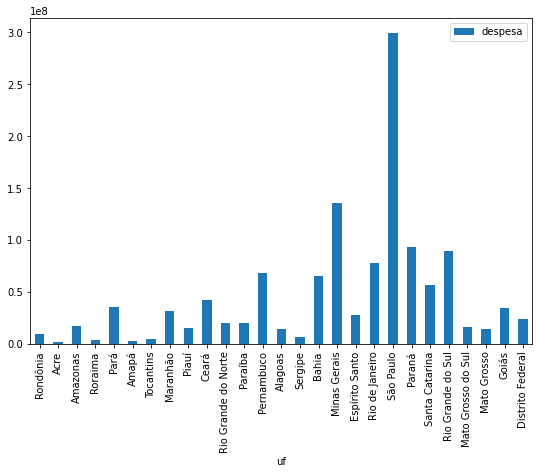

In [57]:
comparaSUSePopJun[["despesa"]].plot(kind="bar",figsize=(9,6))

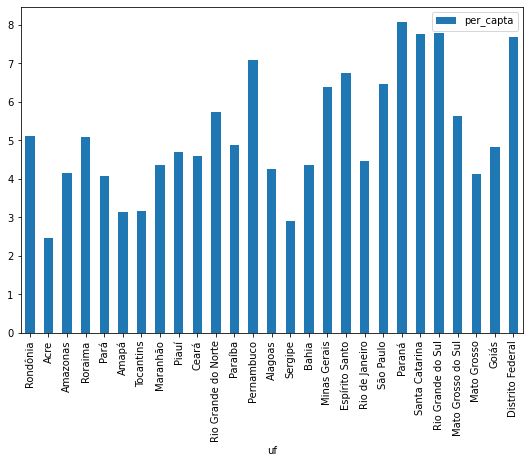

In [58]:
comparaSUSePopJun[["per_capta"]].plot(kind="bar",figsize=(9,6))

##Seaborn (usa Matplotlib)

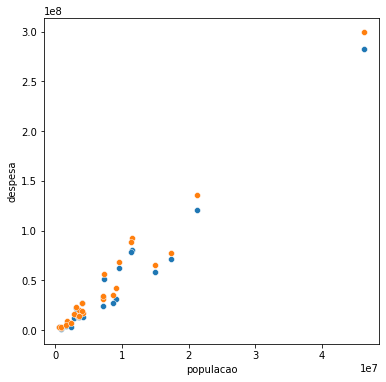

In [59]:
import seaborn as sbn
plt.figure(figsize=(6,6))
sbn.scatterplot(data=comparaSUSePop,x="populacao",y="despesa")
sbn.scatterplot(data=comparaSUSePopJun,x="populacao",y="despesa")

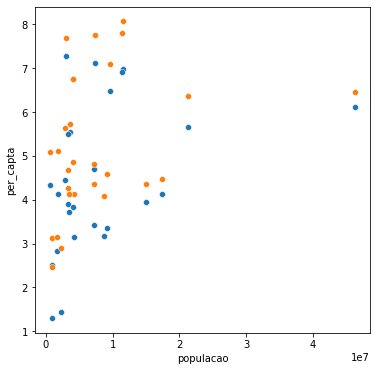

In [60]:
plt.figure(figsize=(6,6))
sbn.scatterplot(data=comparaSUSePop,x="populacao",y="per_capta")
sbn.scatterplot(data=comparaSUSePopJun,x="populacao",y="per_capta")

In [2]:
#dadosSUS.T
sbn.scatterplot(data=dadosSUS.T,x=,y=dadosSUS["uf"].loc["São Paulo"])

SyntaxError: ignored

## Criando uma função que define o dataset desejado a partir de uma parâmetro e um mês...

Tratando todos os dados do data set por aqui

In [ ]:
def comparativo_mes(dados, mes_ref: str):  #type hint é a defiição de tipos de dados na função do python
  datasetnovo = dados[f"{mes_ref}"]

  dadosSUS["uf_code"]=dadosSUS["Unidade da Federação"].str[:2]
  dadosSUS["uf"]=dadosSUS["Unidade da Federação"].str[2:]
  dadosSUS["uf"]=dadosSUS["uf"].str.strip()

  populacao = populacao.drop("Unidade federativa", axis=1)
  populacao = populacao.drop("População", axis=1)
  populacao = populacao.drop("% da pop. total", axis=1)
  populacao = populacao.drop("País comparável", axis=1)

  mediaJul = comparaSUSePop["2020/Jul"].mean()
  medianaJul = comparaSUSePop["2020/Jul"].median()

  comparaSUSePop["per_capta"] = comparaSUSePop["2020/Jul"]/comparaSUSePop["populacao"]
  comparaSUSePop["desvio_media"] = comparaSUSePop["2020/Jul"]/mediaJul
  comparaSUSePop["desvio_mediana"] = comparaSUSePop["2020/Jul"]/medianaJul

#Datetime do Python

In [ ]:
import time
from datetime import date

today = date.today()
diaUm = date(1975,11,4)

diaUm

In [ ]:
today

In [ ]:
todayTS = date.fromtimestamp(time.time())
todayTS